# Jungho John Ro Homework 4 WeatherPy
----

### Analysis
* It's not surprising to see that Max Temperature is higher when closer to the equator, however the cities in the southern hemisphere seem to have higher max temps than the northern hemisphere (December Solstice).   
* There is a cluster of cities that have a 100% humidity that lie between a latitude -20 and 10. 
* For cloudiness it is interesting to see majority of the cities lie in 4 major categories: 0%, 20%, 40%, and right around 80%. 

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Creating Dataframe to store results needed for scatter plots
cities_df = pd.DataFrame({"Cities":cities})

# Creating Columns for the data needed in Dataframe
cities_df["Cloudiness"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df["Humidity"] = ""
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Wind Speed"]= ""

cities_df.head()

,Cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,riyadh,,,,,,,,
1,ushuaia,,,,,,,,
2,naze,,,,,,,,
3,esperance,,,,,,,,
4,punta arenas,,,,,,,,


In [4]:
# Print the Start of the Log of data
print("Beginning Data Retrieval")
print("--------------------------")

# Creating Loop for each city to pull data 
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"

for index, row in cities_df.iterrows():
    city = row['Cities']
    cities = str(city)
    weather_url = base_url + "&appid=" + api_key + "&q=" + cities
    city_weather = requests.get(weather_url).json()
    try:
        cities_df.loc[index, "Cloudiness"] = city_weather["clouds"]["all"]
        cities_df.loc[index, "Country"] = city_weather["sys"]["country"]
        cities_df.loc[index, "Date"] =  city_weather["dt"]
        cities_df.loc[index, "Humidity"] = city_weather["main"]["humidity"]
        cities_df.loc[index, "Lat"] = city_weather["coord"]["lat"]
        cities_df.loc[index, "Lng"] = city_weather["coord"]["lon"]
        cities_df.loc[index, "Max Temp"] = city_weather["main"]["temp_max"]
        cities_df.loc[index, "Wind Speed"] = city_weather["wind"]["speed"]
        print(f'Processing Record | {city}')
    except:
        print("City not found. Skipping...")

print("--------------------------")
print("Data Retrieval Complete")
print("--------------------------")

Beginning Data Retrieval
--------------------------
Processing Record | riyadh
Processing Record | ushuaia
Processing Record | naze
Processing Record | esperance
Processing Record | punta arenas
Processing Record | broken hill
Processing Record | ribeira grande
Processing Record | mataura
City not found. Skipping...
City not found. Skipping...
Processing Record | sao joao da barra
Processing Record | saldanha
Processing Record | georgetown
Processing Record | ilulissat
Processing Record | norman wells
Processing Record | auki
Processing Record | pevek
Processing Record | busselton
Processing Record | aksarka
Processing Record | sao filipe
Processing Record | cockburn town
Processing Record | lagoa
Processing Record | hermanus
Processing Record | rabo de peixe
Processing Record | fuxin
Processing Record | lovington
Processing Record | nome
Processing Record | bluff
Processing Record | grindavik
Processing Record | butaritari
Processing Record | sal rei
Processing Record | jalor
Processi

Processing Record | kasongo-lunda
Processing Record | coahuayana
City not found. Skipping...
Processing Record | rudnaya pristan
Processing Record | jiayuguan
Processing Record | chichibu
Processing Record | kitaibaraki
City not found. Skipping...
Processing Record | abeokuta
Processing Record | cabo san lucas
Processing Record | valdivia
Processing Record | faya
Processing Record | boulder
Processing Record | lazaro cardenas
City not found. Skipping...
Processing Record | hofn
Processing Record | itaueira
Processing Record | pangnirtung
Processing Record | north platte
Processing Record | tokonou
Processing Record | baykit
Processing Record | moroto
City not found. Skipping...
City not found. Skipping...
Processing Record | bandarbeyla
City not found. Skipping...
Processing Record | vila franca do campo
Processing Record | houma
Processing Record | barrow
Processing Record | san patricio
Processing Record | ixtapa
Processing Record | miyako
Processing Record | angoche
Processing Recor

Processing Record | ladybrand
Processing Record | praia
Processing Record | juneau
Processing Record | aklavik
Processing Record | sambava
Processing Record | hudson bay
Processing Record | stilfontein
Processing Record | bellavista
Processing Record | abha
Processing Record | ahipara
Processing Record | shahpur chakar
Processing Record | hun
City not found. Skipping...
Processing Record | avera
Processing Record | nuuk
City not found. Skipping...
Processing Record | saint-joseph
Processing Record | antalaha
Processing Record | punakha
Processing Record | de-kastri
Processing Record | stromness
City not found. Skipping...
Processing Record | port macquarie
Processing Record | newnan
Processing Record | puerto cabezas
City not found. Skipping...
Processing Record | takhli
Processing Record | san juan de la maguana
Processing Record | baiyin
City not found. Skipping...
Processing Record | rafaela
Processing Record | mackenzie
Processing Record | bom jesus
Processing Record | beberibe
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Exporting the Data as a CSV file
cities_df.to_csv('cities.csv')

cities_df.count()

Cities        617
Cloudiness    617
Country       617
Date          617
Humidity      617
Lat           617
Lng           617
Max Temp      617
Wind Speed    617
dtype: int64

In [6]:
cities_df.head()

,Cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,riyadh,40,SA,1554490800,39,24.63,46.72,80.6,9.17
1,ushuaia,75,AR,1554490800,66,-54.81,-68.31,55.4,13.87
2,naze,40,NG,1554490800,79,5.43,7.07,84.2,5.82
3,esperance,20,TT,1554495438,55,10.24,-61.45,88,13.87
4,punta arenas,90,CL,1554494550,76,-53.16,-70.91,53.6,28.86


In [7]:
# Changing the data in columns as floats.
cities_df["Cloudiness"] = pd.to_numeric(cities_df["Cloudiness"])
cities_df["Humidity"] = pd.to_numeric(cities_df["Humidity"])
cities_df["Lat"] = pd.to_numeric(cities_df["Lat"])
cities_df["Max Temp"] = pd.to_numeric(cities_df["Max Temp"])
cities_df["Wind Speed"] = pd.to_numeric(cities_df["Wind Speed"])

cities_df.dtypes

Cities         object
Cloudiness    float64
Country        object
Date           object
Humidity      float64
Lat           float64
Lng            object
Max Temp      float64
Wind Speed    float64
dtype: object

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

/Users/junghoro/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


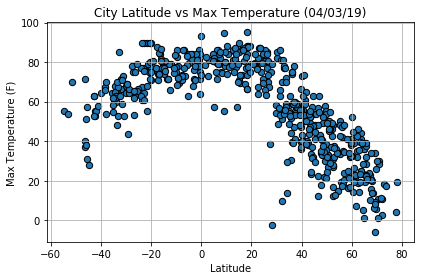

In [8]:
cities_df.plot(kind="scatter", x="Lat", y="Max Temp", 
               s=40, grid="True", edgecolors="black")
plt.title("City Latitude vs Max Temperature (04/03/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.tight_layout()
plt.savefig("Latitude vs. Temperature Plot.png")
plt.show()

#### Latitude vs. Humidity Plot

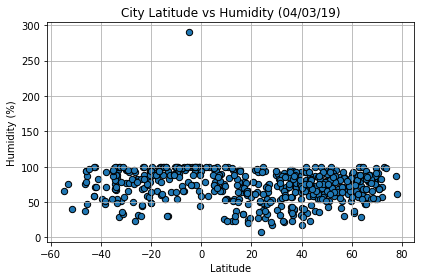

In [9]:
cities_df.plot(kind="scatter", x="Lat", y="Humidity", 
               s=40, grid="True", edgecolors="black")
plt.title("City Latitude vs Humidity (04/03/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.tight_layout()
plt.savefig("Latitude vs. Humidity Plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

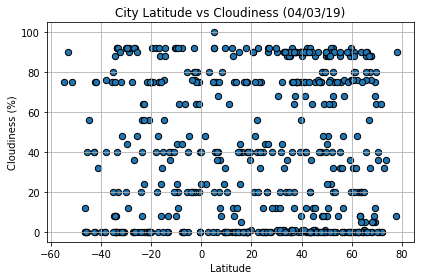

In [10]:
cities_df.plot(kind="scatter", x="Lat", y="Cloudiness", 
               s=40, grid="True", edgecolors="black")
plt.title("City Latitude vs Cloudiness (04/03/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.tight_layout()
plt.savefig("Latitude vs. Cloudiness Plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

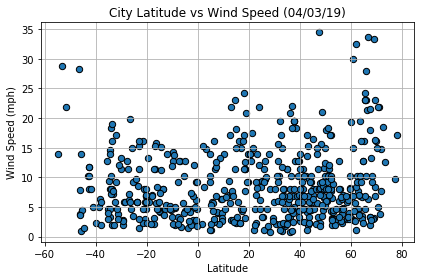

In [11]:
cities_df.plot(kind="scatter", x="Lat", y="Wind Speed", 
               s=40, grid="True", edgecolors="black")
plt.title("City Latitude vs Wind Speed (04/03/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.tight_layout()
plt.savefig("Latitude vs. Wind Speed Plot.png")
plt.show()